In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data source and description: https://www.kaggle.com/c/titanic/data

In [12]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Step 0: data preparation

<AxesSubplot:>

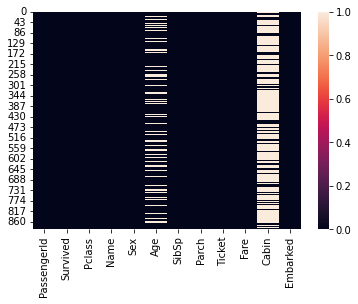

In [13]:
sns.heatmap(data.isnull())

In [21]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

<AxesSubplot:>

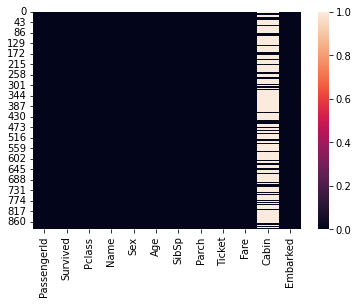

In [22]:
sns.heatmap(data.isnull())

In [36]:
sns.set_style('darkgrid')

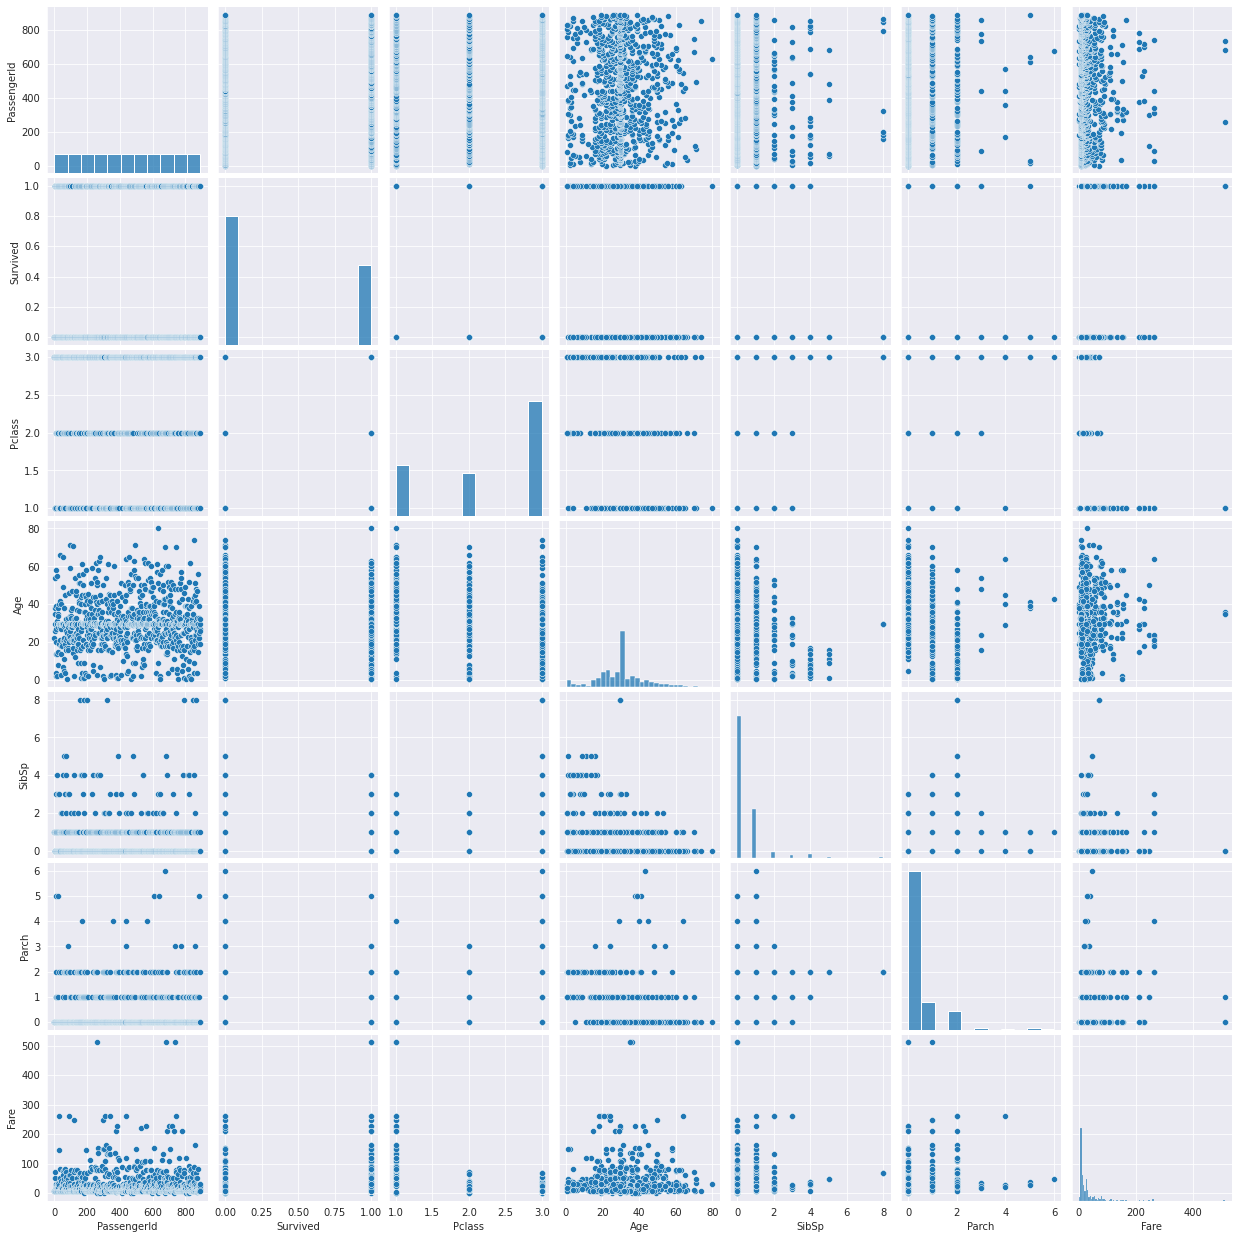

In [38]:
sns.pairplot(data)

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
survived = data[data['Survived'] == 1].count()
total = data['PassengerId'].max()
survived_fraction = (survived/total * 100).round(2)
survived_fraction

PassengerId    38.38
Survived       38.38
Pclass         38.38
Name           38.38
Sex            38.38
Age            38.38
SibSp          38.38
Parch          38.38
Ticket         38.38
Fare           38.38
Cabin          15.26
Embarked       38.16
dtype: float64

<AxesSubplot:xlabel='Sex'>

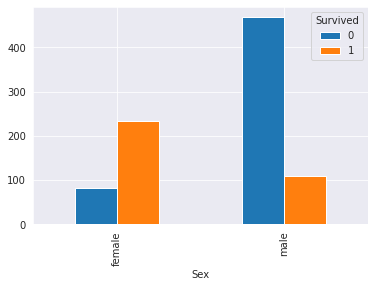

In [47]:
sex_vs_survived = data.pivot_table(values = 'PassengerId', index = 'Sex', columns = 'Survived', aggfunc = np.count_nonzero)
sex_vs_survived.plot.bar()

<AxesSubplot:xlabel='Pclass'>

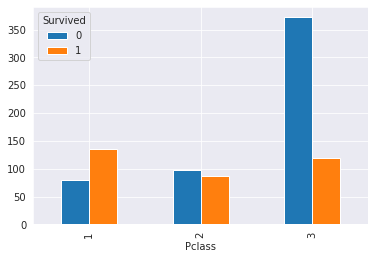

In [90]:
Pclass_vs_survived = data.pivot_table(values = 'PassengerId', index = 'Pclass', columns = 'Survived', aggfunc = np.count_nonzero)
Pclass_vs_survived.plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

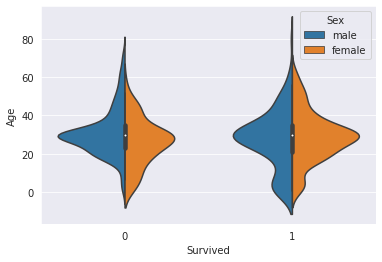

In [106]:
sns.violinplot(x = 'Survived', y = 'Age', data = data, hue = 'Sex', split = True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

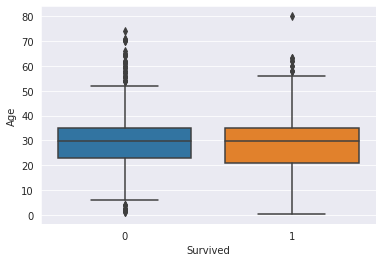

In [103]:
sns.boxplot(x = 'Survived', y= 'Age', data = data)

In [101]:
survived = data[data['Survived'] == 1]
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.549778,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.772498,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [102]:
not_survived = data[data['Survived'] == 0]
not_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.415100,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.457370,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,29.699118,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


Conclusions: Analysis of different factors that impacted survival in the Titanic disaster revealed some intersting patterns. Only about 38% of passengers survived that disaster. Clearly women had higher chance to survive than men. Passengers in class 1 and 2 had much higher chance to survive than passengers in class 3. The average age of survivors was around 28 years old, which is slightly lower than average age of victims: 30 years old. Remarkably, the oldest person who lived through the crash was 80 years old, and the youngest was the child of 5 months. 